# Text Classification

### 1. Classification Definition

- 데이터 유형에는 다음과 같은 종류가 있습니다.
  - 범주적 데이터(categorical data) : 남/녀, 1/2/3/4학년, 사무직/생산직/전문직등과 같은 관찰대상의 특성을 기초로 하는 데이터
  - 수치적 데이터(numerical data): 체중, 거리, 시간과 같은 측정치 기반 도수(counts)로 이루어진 자료
    - 이산적 자료(discrete data) : 도수(counts)와 같이 한정된 숫자에서 그값이 결저, 0/1/2 등의 정수(integer)값을 취한다.
    - 연속적 자료(continuous data) : 시계열 데이터, 데이터가 생성될 때 측정하는 사람에 따라 그 표현이 달라질수 있다.

- classification은 discrete value(이산적 자료)에 대한 predict를 하기 위한 방법으로, 다음의 형태가 존재합니다.
<p align="center"><img src="img/023_text_ml_classification.png" alt="Drawing" style="width: 700px; height: 200px; align:center"/></p>
  - binary classification<br>
  - multi class classification<br>
<p align="center"><img src="img/024_text_ml_multi_class_classification.png" alt="Drawing" style="width: 550px; height: 250px; align:center"/></p>
  - multi label classification<br>
<p align="center"><img src="img/025_text_ml_multi_label_classification.png" alt="Drawing" style="width: 550px; height: 250px; align:center"/></p>
  - 다른 사례로 설명하면 multi-class 와 multi-label의 개념적 차이는 아래와 같습니다.
<p align="center"><img src="img/026_text_ml_multiclass_multilabel.png" alt="Drawing" style="width: 550px; height: 250px; align:center"/></p>

#### 1-2. Text Classification Usecases
- 감성 분석(sentiment analysis, 감성분석) : positive, negative
- 의도 분류(intent classification) : 화자의 문장(utterance)가 가지는 의도(말하고자 하는 바)를 분류
- NER(Named Entity Recognition) : 화자의 문장(utterance)에 포함된 특정 명사(location, person, time)등의 정보를 엔티티(entity)라고 함

#### 1-3. Text Classification에 사용할수 있는 머신러닝 모델


- Decision Tree
- Random Forest
- Gradient Boosting
- Support Vector Machine
- Multi Layers Perceptron(FFN)
- K-NN
- CNN
- RNN

### 2. sentiment analysis using fasttext(pypi)

In [1]:
import fasttext

supervised_corpus_fname = './data/fasttext/merged_comments_supervised.txt'
supervised_name = './data/fasttext/merged_comments_classifier'

- 'Text Representation'에서 사용한 영화 리뷰 Corpus파일을 통해서 리뷰에 대한 sentiment analysis를 할수 있습니다.
- 평점 데이터를 이용하여 classifier 를 학습하는 코드입니다. 8점 이상을 positive, 3점 이하를 negative 라 하였습니다. 
- "word_ngrams = 1" parameter는 단어의 ngram 까지도 잡아주는 parameter 입니다만, 지금 공개된 버전에서는 학습이 안되는 버그가 있습니다. (0.8.3) 기본값인 1만을 이용합니다. 

In [2]:
TRAIN_FASTTEXT = False

if TRAIN_FASTTEXT:
    classifier_model = fasttext.supervised(supervised_corpus_fname, supervised_name, label_prefix='__label__', thread=8)
else:
    classifier_model = fasttext.load_model(supervised_name+'.bin', label_prefix='__label__')

- data/fasttext폴더에 'merged_comments_classifier.bin'파일이 생성됨을 확인할 수 있다.
- 모델에 기록된 label데이터를 확인할 수 있다.

In [3]:
classifier_model.labels

['positive', 'negative']

- classifier.predict() 는 array of str을 입력받아야 합니다. k는 가장 가까운 클래스 k개의 개수입니다. 영화 리뷰는 positive, negative의 2개 클래스가 존재합니다.

In [4]:
words = '이게 뭐야 재미없다 정말'.split()
classifier_model.predict(words,k=2)

[['negative', 'positive'],
 ['negative', 'positive'],
 ['negative', 'positive'],
 ['positive', 'negative']]

In [5]:
classifier_model.predict_proba(words,k=2)

[[('negative', 0.927734), ('positive', 0.0703125)],
 [('negative', 0.984375), ('positive', 0.0136719)],
 [('negative', 0.998047), ('positive', 1.95313e-08)],
 [('positive', 0.912109), ('negative', 0.0859375)]]

<h4 align="left"> classification 결과</h4> 
<p align="center"><img src="img/020_text_ml_fasttext_sentiment_analysis.png" alt="Drawing" style="width: 500px; height: 200px; align:center"/></p>

In [6]:
words = '언플쩐다 재미없다 이상해'.split()
classifier_model.predict_proba(words,k=2)

[[('positive', 0.576172), ('negative', 0.421875)],
 [('negative', 0.998047), ('positive', 1.95313e-08)],
 [('negative', 0.888672), ('positive', 0.109375)]]

### 3. text classification using fasttext(gensim)

- text classification은 챗봇 기술에서 의도(intent) 분류하는데 사용됩니다.
- 의도(intent)는 화자가 말한 문장(utterance)에서 문장이 가지는 의미(meaning)를 말합니다.

In [8]:
from konlpy.tag import Okt #Twitter
import pandas as pd
twitter = Okt()

In [9]:
# train data
data_1 = pd.read_csv('./data/hai/classification_train_data.csv')
# text file을 pandas의 read_csv를 이용해서 읽어 들입니다. 이 데이터를 test data로 활용합니다.
data_2 = pd.read_csv('./data/hai/training_original_utterances_test_new.txt', delimiter="\|\|", header=None, names=["intent_nm", "utterance"])

/Users/hikari/hanwharnd/anaconda3/envs/ai_chatbot/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [10]:
# 데이터의 summary 정보를 확인합니다.
data_1.describe()

,intent_nm,utterance
count,9142,9142
unique,11,9138
top,ECS_SNC_STOCK_PRICE,프로젝트 예산 잔액
freq,2672,2


In [11]:
data_2.describe()

,intent_nm,utterance
count,5,5
unique,4,5
top,ECS_SNC_INFORMATION,너 뭐하는 아이니
freq,2,1


In [12]:
# Plot of intent counts (Unnormalized)
vc_1 = data_1['intent_nm'].value_counts()

In [13]:
# 각 intent별로 가지고 있는 utterance를 확인합니다.
vc_1

ECS_SNC_STOCK_PRICE                                2672
ECS_SNC_WEATHER_FORECAST                           2064
ECS_SNC_PI_ERP_INQUIRY_TEAM_BUDGET                 1281
ECS_SNC_SS1_CIRCLE_INQUIRY_THE_PERSON_IN_CHARGE     948
ECS_SNC_SS1_CIRCLE_INQUIRY_SUPPORTING_BUSINESS      580
ECS_SNC_PI_ERP_INQUIRY_PERSONAL_B_CARD              540
ECS_SNC_SS1_CIRCLE_INQUIRY_APPROVAL_FORM_LINK       497
ECS_SNC_INFORMATION                                 456
ECS_SNC_GREETING                                     52
ECS_SNC_COMPLIMENT                                   44
None                                                  8
Name: intent_nm, dtype: int64

In [14]:
# Sort by index
vc_1 = vc_1.sort_index()

In [15]:
#!pip install matplotlib

In [16]:
vc_1

ECS_SNC_COMPLIMENT                                   44
ECS_SNC_GREETING                                     52
ECS_SNC_INFORMATION                                 456
ECS_SNC_PI_ERP_INQUIRY_PERSONAL_B_CARD              540
ECS_SNC_PI_ERP_INQUIRY_TEAM_BUDGET                 1281
ECS_SNC_SS1_CIRCLE_INQUIRY_APPROVAL_FORM_LINK       497
ECS_SNC_SS1_CIRCLE_INQUIRY_SUPPORTING_BUSINESS      580
ECS_SNC_SS1_CIRCLE_INQUIRY_THE_PERSON_IN_CHARGE     948
ECS_SNC_STOCK_PRICE                                2672
ECS_SNC_WEATHER_FORECAST                           2064
None                                                  8
Name: intent_nm, dtype: int64

In [17]:
#!pip install scipy

In [18]:
def preprocess_utterance(tokenizer, utterance, join=False):
    assert hasattr(tokenizer, 'pos')
    tagged_u = tokenizer.pos(utterance)
    tagged_u = [u for u in tagged_u if u[1] != 'Josa']
    if join:
        return ' '.join([u[0] for u in tagged_u])
    else:
        return [u[0] for u in tagged_u]

In [19]:
def preprocess_utterances(tokenizer, utterances):
    '''Preprocess multiple utterances.'''
    return [preprocess_utterance(tokenizer, u, False) for u in utterances]

In [20]:
train_data = data_1

In [21]:
# dataframe에 'X'컬럼에 POS Tagger를 통해 tokenize된 텍스트를 append한다.
train_data['X'] = preprocess_utterances(twitter, train_data['utterance'].apply(str))

In [22]:
train_data.sample(10)

,intent_nm,utterance,X
3477,ECS_SNC_PI_ERP_INQUIRY_PERSONAL_B_CARD,법인카드 사용 내역 알려 줘 보십시오,"[법인, 카드, 사용, 내, 역, 알려, 줘, 보십시오]"
7646,ECS_SNC_STOCK_PRICE,한화 현재 가격 알려 줬으면 좋겠어요,"[한화, 현재, 가격, 알려, 줬으면, 좋겠어요]"
8186,ECS_SNC_STOCK_PRICE,한화손해보험 주가 알려 줘 봤으면,"[한화, 손해, 보험, 주가, 알려, 줘, 봤으면]"
2411,ECS_SNC_SS1_CIRCLE_INQUIRY_THE_PERSON_IN_CHARGE,퇴직금 담당자 누구죠,"[퇴직금, 담당자, 누구]"
8714,ECS_SNC_SS1_CIRCLE_INQUIRY_SUPPORTING_BUSINESS,리조트이용 알려 줄 수 있어,"[리조트, 이용, 알려, 줄, 수, 있어]"
7883,ECS_SNC_STOCK_PRICE,삼성SDI 주가는 어떠나요,"[삼성, SDI, 주가, 어떠나요]"
811,ECS_SNC_SS1_CIRCLE_INQUIRY_APPROVAL_FORM_LINK,전자결재 휴가 상신 올려 주면 좋겠어,"[전자, 결재, 휴가, 상신, 올려, 주면, 좋겠어]"
5408,ECS_SNC_WEATHER_FORECAST,지금 서울시 날씨 알려 줘 보라니까,"[지금, 서울시, 날씨, 알려, 줘, 보라]"
2201,ECS_SNC_PI_ERP_INQUIRY_TEAM_BUDGET,우리 팀 예산 부탁할게요,"[우리, 팀, 예산, 부탁, 할게요]"
5171,ECS_SNC_WEATHER_FORECAST,현재 동작구 날씨 알려 줘 볼 수 있을까,"[현재, 동작구, 날씨, 알려, 줘, 볼, 수, 있을까]"


- gensim FastText를 통해 vector representation을 수행합니다.
- gensim FastText에 대한 configuration은 다음을 참조하시면 됩니다.<br>
&nbsp;https://radimrehurek.com/gensim/models/deprecated/fasttext.html

In [23]:
from gensim.models.fasttext import FastText

# Configure 'fasttext.fastText' model
config = {'size' : 32, 'min_count' : 1, 'word_ngrams' : 1, 'min_n' : 1,
          'alpha' : 0.025, 'min_alpha' : 0.025, 'iter' : 500, 'window' : 5}
fasttext_model = FastText(**config)

In [24]:
# Build Vocabulary & Train vectors
fasttext_model.build_vocab(sentences=train_data['X'])

- 우리의 데이터 셋은 전체 개수가 9142개 이고, 아래 데이터를 통해서 9142개 라는 것을 확인 할 수 있습니다.

In [25]:
fasttext_model.corpus_count

9142

In [26]:
# total_examples은 문장(utterance)의 개수(count)이며, epochs은 학습 횟수를 의미합니다.
fasttext_model.train(sentences=train_data['X'], total_examples=fasttext_model.corpus_count, epochs=fasttext_model.epochs)

In [27]:
# Get vectors for both train data
fasttext_train = [fasttext_model.wv[x] for x in train_data['X']]

In [28]:
# 1st row의 vector value를 확인합니다.
fasttext_train[0]

array([[-1.2843846e+00,  1.1818156e+00,  1.9060488e+00,  1.6916990e+00,
        -7.5750291e-01,  1.4406958e-01,  1.6105643e-01, -4.3226337e-01,
         4.9929577e-01, -5.9178054e-01, -2.8983968e-01, -9.3522167e-01,
        -1.5362878e+00,  1.1645832e+00, -3.8213587e-01, -3.3554804e-01,
         5.6607735e-01,  8.1153977e-01, -1.3985950e+00,  2.7271146e-01,
         7.8097236e-01, -8.5029238e-01,  1.7961985e+00,  7.5694972e-01,
         1.6039064e+00, -1.8116308e+00,  2.6355798e+00, -3.8402680e-01,
        -1.5667831e+00, -7.6803744e-01, -8.3586675e-01, -1.7669640e+00],
       [-7.6725578e-01,  1.1737494e+00,  1.6009905e+00,  1.1251053e+00,
        -3.2773650e-01, -1.3155318e-03,  4.9420071e-01,  7.0426114e-02,
         2.9108012e-01, -7.8804278e-01, -6.9971949e-01, -1.3883531e+00,
        -1.0651566e+00,  1.0284539e+00, -1.4091554e-01,  4.9180242e-01,
         6.6261846e-01,  9.7184443e-01, -8.1629068e-01, -1.8060808e-01,
         6.8042606e-01, -3.3139887e-01,  1.2461942e+00,  7.3094

In [29]:
# 문장(utterance)의 vector representation을 위해서 average를 처리함 (Average the vectors if length > 1)
import numpy as np
fasttext_train = [np.mean(x, axis=0) for x in fasttext_train]

In [30]:
#바로 위의 2개 vector가 average되어 한개 vector값으로 변경되었음을 확인할 수 있습니다.
fasttext_train[0]

array([-1.0258203 ,  1.1777825 ,  1.7535197 ,  1.4084022 , -0.5426197 ,
        0.07137702,  0.32762855, -0.18091863,  0.39518794, -0.68991166,
       -0.4947796 , -1.1617874 , -1.3007221 ,  1.0965185 , -0.2615257 ,
        0.07812719,  0.61434793,  0.8916921 , -1.1074429 ,  0.04605169,
        0.7306992 , -0.59084564,  1.5211964 ,  0.7439491 ,  1.5501742 ,
       -1.385884  ,  2.0865245 , -0.4140122 , -1.3000331 , -0.80102825,
       -0.52943337, -1.6249225 ], dtype=float32)

In [31]:
# Stack the vectors
fasttext_train = np.stack(fasttext_train, axis=0)

In [32]:
fasttext_train[0]

array([-1.0258203 ,  1.1777825 ,  1.7535197 ,  1.4084022 , -0.5426197 ,
        0.07137702,  0.32762855, -0.18091863,  0.39518794, -0.68991166,
       -0.4947796 , -1.1617874 , -1.3007221 ,  1.0965185 , -0.2615257 ,
        0.07812719,  0.61434793,  0.8916921 , -1.1074429 ,  0.04605169,
        0.7306992 , -0.59084564,  1.5211964 ,  0.7439491 ,  1.5501742 ,
       -1.385884  ,  2.0865245 , -0.4140122 , -1.3000331 , -0.80102825,
       -0.52943337, -1.6249225 ], dtype=float32)

In [33]:
#!pip install xlrd

In [34]:
test_data = data_2
#test_data['utterance'].apply(str)
test_data['X']  = preprocess_utterances(twitter, test_data['utterance'].apply(str))

In [35]:
# Top 5 row 데이터를 확인합니다.
test_data.head()

,intent_nm,utterance,X
0,ECS_SNC_INFORMATION,너 뭐하는 아이니,"[너, 뭐, 하는, 아이]"
1,ECS_SNC_INFORMATION,대답 가능한 리스트 뭘까,"[대답, 가능한, 리스트, 뭘, 까]"
2,ECS_SNC_STOCK_PRICE,삼성증권 주가 알려줘,"[삼성, 증권, 주가, 알려줘]"
3,ECS_SNC_SS1_CIRCLE_INQUIRY_APPROVAL_FORM_LINK,결재,[결재]
4,ECS_SNC_PI_ERP_INQUIRY_TEAM_BUDGET,금융사업부 예비비 조회,"[금융, 사업, 부, 예, 비비, 조회]"


In [36]:
# test_data의 vector representation을 구합니다.
fasttext_test  =  [fasttext_model.wv[x] for x in test_data['X']]

In [37]:
fasttext_test[0]

array([[-2.98742175e+00, -2.37384486e+00,  1.75805354e+00,
         6.66945040e-01,  4.97175407e+00, -8.57000923e+00,
         8.24687839e-01,  5.90562344e+00,  2.45797205e+00,
         1.08592577e+01,  2.17012835e+00, -2.95463419e+00,
         1.15197504e+00,  3.76315689e+00,  3.00198174e+00,
         4.13392925e+00, -8.13433826e-01, -2.00601077e+00,
         7.25478083e-02, -1.99266505e+00,  1.86136591e+00,
         3.30460358e+00,  2.75961637e+00,  1.51438141e+00,
         4.18192816e+00, -8.35881233e+00,  1.32028162e-01,
        -1.80232394e+00, -5.49063981e-02, -2.18135047e+00,
         4.77464485e+00,  3.57567859e+00],
       [ 5.95866394e+00, -5.91585445e+00, -1.21179271e+00,
        -2.40782094e+00,  1.80252111e+00, -5.88836336e+00,
         4.84983540e+00, -9.00969696e+00,  9.29114044e-01,
         1.37030053e+00,  1.25388491e+00,  5.96484482e-01,
         3.95705521e-01, -3.18648624e+00,  8.48319435e+00,
         5.32864571e+00,  2.55074054e-01,  4.80537701e+00,
         3.76

In [38]:
# 문장(utterance)의 vector representation을 위해서 average를 처리함 (Average the vectors if length > 1)
fasttext_test  = [np.mean(x, axis=0) for x in fasttext_test]

In [39]:
#바로 위의 2개 vector가 average되어 한개 vector값으로 변경되었음을 확인할 수 있습니다.
fasttext_test[0]

array([ 9.10844386e-01, -1.69999397e+00,  4.62804258e-01, -7.12960005e-01,
        3.13403606e+00, -4.11851263e+00,  2.14729381e+00, -5.72431326e-01,
       -1.94931626e-01,  2.27149463e+00, -9.78098512e-02,  1.04759312e+00,
       -4.72619087e-02, -7.81434655e-01,  3.10385847e+00,  2.47635174e+00,
        3.95980537e-01,  1.31807148e+00,  4.22825694e-01, -2.22989845e+00,
       -5.46794087e-02, -9.04551893e-02,  2.48653579e+00, -5.06523550e-01,
        6.86598778e-01, -5.13726950e+00,  1.73353791e+00, -1.37981737e+00,
       -1.17743075e-01, -7.40362883e-01,  2.38182815e-03,  1.26448739e+00],
      dtype=float32)

In [40]:
# Stack the vectors
fasttext_test  = np.stack(fasttext_test, axis=0)

In [41]:
print("[FastText] train data shape: {}".format(fasttext_train.shape))
print("[FastText] test data shape : {}".format(fasttext_test.shape))

[FastText] train data shape: (9142, 32)
[FastText] test data shape : (5, 32)


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

-------------------

<p align="center"><img src="img/tip.jpeg" alt="Drawing" style="width: 50px; height: 30px; align:center"/><h4 align="left"> Confusion Matrix </h4> </p> 
- 머신러닝(특히 statistical classification) 문제에서 error matrix와 같은 역할을 하는 알고리즘의 성능(performance) visualization을 위한 matrix<br>
- 주로 supervised learning에서 confusion matrix를 사용함(unsupervised learning에서는 matching matrix를 사용함)
- 관련 논문에서는 recall, precision외에 이 둘을 1:1로 결합한 F1 Score를 사용함

<p align="center"><img src="img/027_text_ml_confusion_matrix.png" alt="Drawing" style="width: 800px; height: 450px; align:center"/></p>

-------------------

<p align="center"><img src="img/028_text_ml_f1_score.png" alt="Drawing" style="width: 700px; height: 250px; align:center"/></p>

In [44]:
import matplotlib.pyplot as plt
# Confusion Matrix
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.figure(1)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.grid(False)
    plt.show(plt.gcf()) 

In [45]:
# 다양한 Classifier 모델을 사용해서 결과를 확인 합니다. scikit-learn패키지를 사용합니다.
# 이때, 앞에서 배운 function을 통해서 여러개의 classiifer를 사용합니다.
# X_train 형태처럼 uppercase로 시작하는 변수는 그것이 matrix형태임을 의미하고, y_train형태처럼 lowercases로 시작하는 변수는 그것이 vector임을 의미합니다.
def run_classifiers(X_train, X_test, y_train, y_test, random_state=2015010720):
    class_names = np.unique(y_train).tolist()
    '''Run a set of ML classification models.'''
    
    print('Decision Tree')
    dt = DecisionTreeClassifier(random_state=random_state)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    plt.figure(figsize=(20,10))
    plot_confusion_matrix(cm_dt, classes=class_names, normalize=False,
                      title='confusion matrix')
    plt.show()
    print('ACC (TRAIN): {:.3f}'.format(dt.score(X_train, y_train)))
    print('ACC  (TEST): {:.3f}'.format(dt.score(X_test, y_test)))
    print('------------------------------------------------------')
    
    print('[Random Forest]')
    rf = RandomForestClassifier(n_estimators=50, random_state=2)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(20,10))
    plot_confusion_matrix(cm_rf, classes=class_names, normalize=False,
                      title='confusion matrix')
    plt.show()
    print('ACC (TRAIN): {:.3f}'.format(rf.score(X_train, y_train)))
    print('ACC  (TEST): {:.3f}'.format(rf.score(X_test, y_test)))
    print('------------------------------------------------------')
    
    print('[Gradient Boosting]')
    gb = GradientBoostingClassifier(n_estimators=50, random_state=random_state)
    gb.fit(X_train, y_train)
    y_pred_gb = gb.predict(X_test)
    
    cm_gb = confusion_matrix(y_test, y_pred_gb)
    plt.figure(figsize=(20,10))
    plot_confusion_matrix(cm_gb, classes=class_names, normalize=False,
                      title='confusion matrix')
    plt.show()
    print('ACC (TRAIN): {:.3f}'.format(gb.score(X_train, y_train)))
    print('ACC  (TEST): {:.3f}'.format(gb.score(X_test, y_test)))
    print('------------------------------------------------------')
    
    print('[Support Vector Machine]')
    svm = SVC()
    svm.fit(X_train, y_train)
    
    y_pred_svm = svm.predict(X_test)
    
    cm_svm = confusion_matrix(y_test, y_pred_svm)
    plt.figure(figsize=(20,10))
    plot_confusion_matrix(cm_svm, classes=class_names, normalize=False,
                      title='confusion matrix')
    plt.show()
    print('ACC (TRAIN): {:.3f}'.format(svm.score(X_train, y_train)))
    print('ACC  (TEST): {:.3f}'.format(svm.score(X_test, y_test)))
    print('------------------------------------------------------')
    
    print('[Multi Layers Perceptron]')
    mlp = MLPClassifier()
    mlp.fit(X_train, y_train)    
    
    y_pred_mlp = mlp.predict(X_test)
    
    cm_mlp = confusion_matrix(y_test, y_pred_mlp)
    plt.figure(figsize=(20,10))
    plot_confusion_matrix(cm_mlp, classes=class_names, normalize=False,
                      title='confusion matrix')
    plt.show()
    print('ACC (TRAIN): {:.3f}'.format(mlp.score(X_train, y_train)))
    print('ACC  (TEST): {:.3f}'.format(mlp.score(X_test, y_test)))
    print('------------------------------------------------------')
    
    print('[K-Nearest Neighbors (K=1)]')
    knn_1 = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
    knn_1.fit(X_train, y_train)
    
    y_pred_knn_1 = knn_1.predict(X_test)
    
    cm_knn_1 = confusion_matrix(y_test, y_pred_knn_1)
    plt.figure(figsize=(20,10))
    plot_confusion_matrix(cm_knn_1, classes=class_names, normalize=False,
                      title='confusion matrix')
    plt.show()
    print('ACC (TRAIN): {:.3f}'.format(knn_1.score(X_train, y_train)))
    print('ACC  (TEST): {:.3f}'.format(knn_1.score(X_test, y_test)))
    print('------------------------------------------------------')
    
    print('[K-Nearest Neighbors (K=9)]')
    knn_9 = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
    knn_9.fit(X_train, y_train)
    
    y_pred_knn_9 = knn_9.predict(X_test)
    
    cm_knn_9 = confusion_matrix(y_test, y_pred_knn_9)
    plt.figure(figsize=(20,10))
    plot_confusion_matrix(cm_knn_9, classes=class_names, normalize=False,
                      title='confusion matrix')
    plt.show()
    print('ACC (TRAIN): {:.3f}'.format(knn_9.score(X_train, y_train)))
    print('ACC  (TEST): {:.3f}'.format(knn_9.score(X_test, y_test)))
    print('------------------------------------------------------')

In [46]:
# (fastText) Input data
X_train_fast = fasttext_train.copy()
y_train_fast = train_data['intent_nm']

X_test_fast = fasttext_test.copy()
y_test_fast = test_data['intent_nm']

Decision Tree
Confusion matrix, without normalization


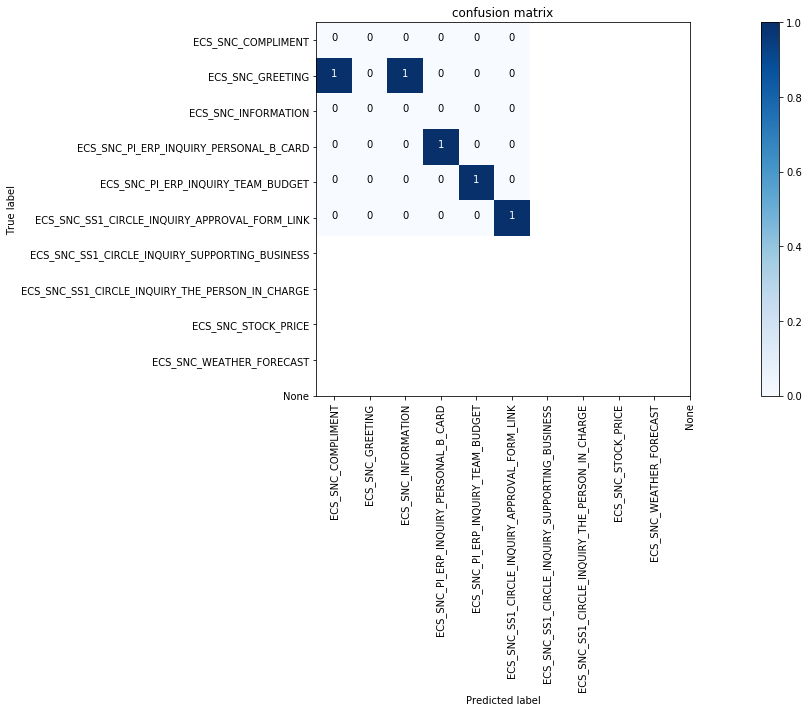

ACC (TRAIN): 1.000
ACC  (TEST): 0.600
------------------------------------------------------
[Random Forest]
Confusion matrix, without normalization


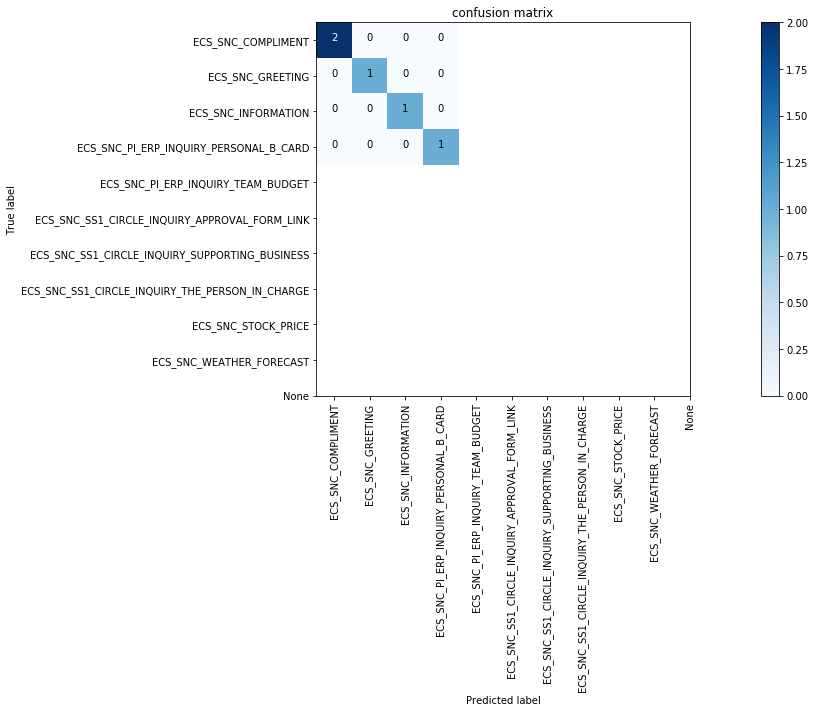

ACC (TRAIN): 1.000
ACC  (TEST): 1.000
------------------------------------------------------
[Gradient Boosting]
Confusion matrix, without normalization


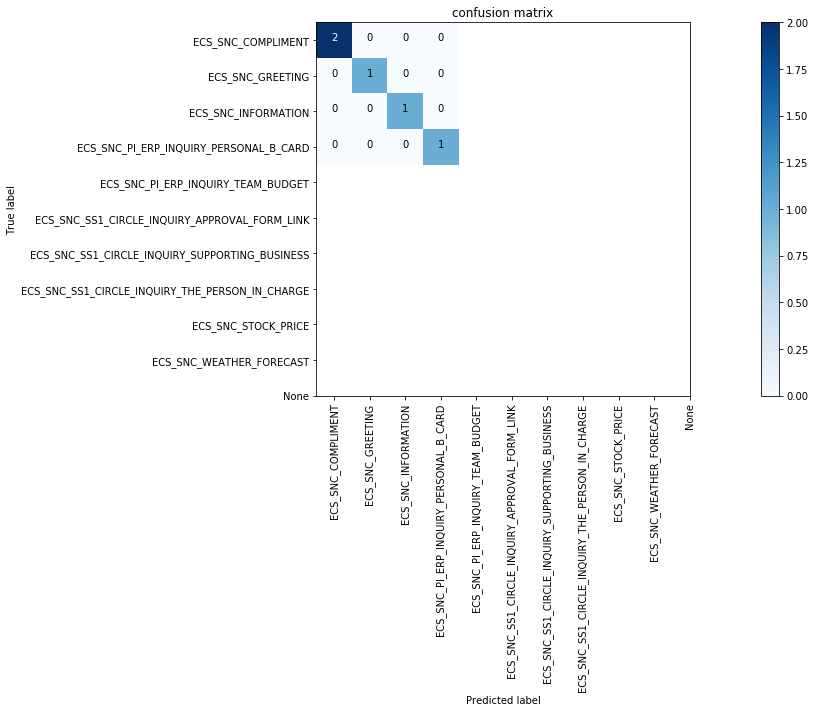

ACC (TRAIN): 1.000
ACC  (TEST): 1.000
------------------------------------------------------
[Support Vector Machine]


/Users/hikari/hanwharnd/anaconda3/envs/ai_chatbot/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix, without normalization


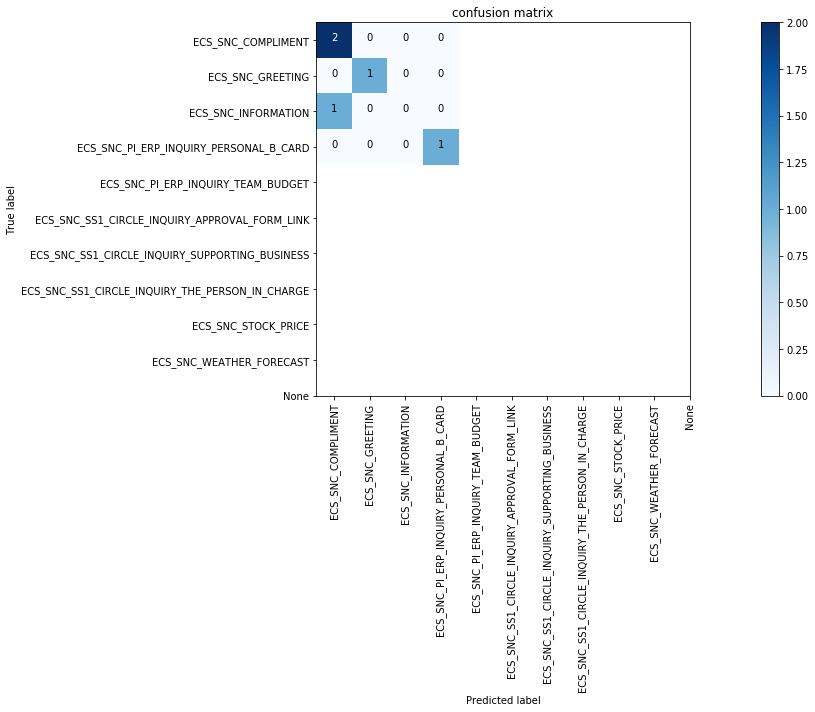

ACC (TRAIN): 0.998
ACC  (TEST): 0.800
------------------------------------------------------
[Multi Layers Perceptron]
Confusion matrix, without normalization


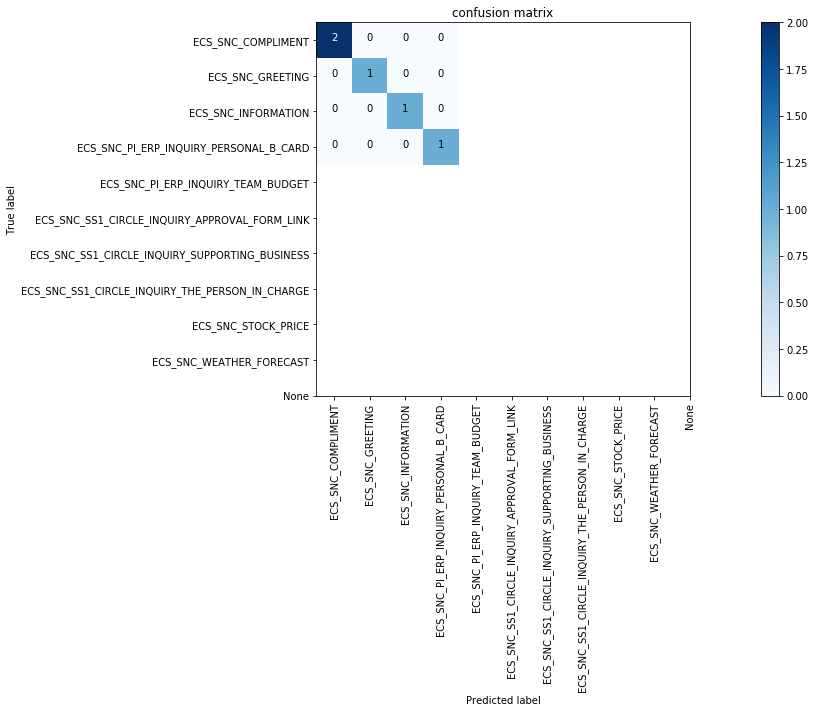

ACC (TRAIN): 1.000
ACC  (TEST): 1.000
------------------------------------------------------
[K-Nearest Neighbors (K=1)]
Confusion matrix, without normalization


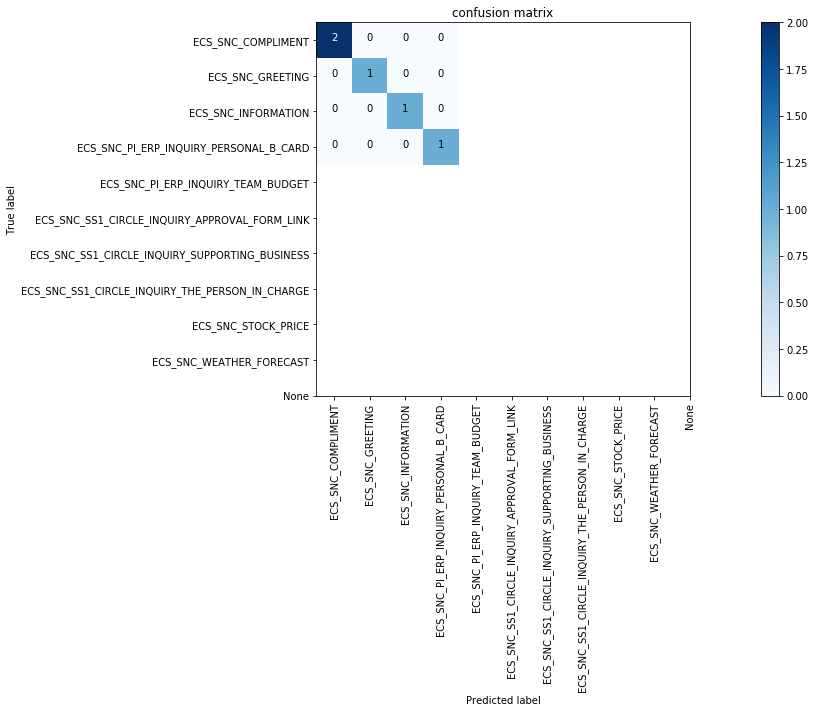

ACC (TRAIN): 1.000
ACC  (TEST): 1.000
------------------------------------------------------
[K-Nearest Neighbors (K=9)]
Confusion matrix, without normalization


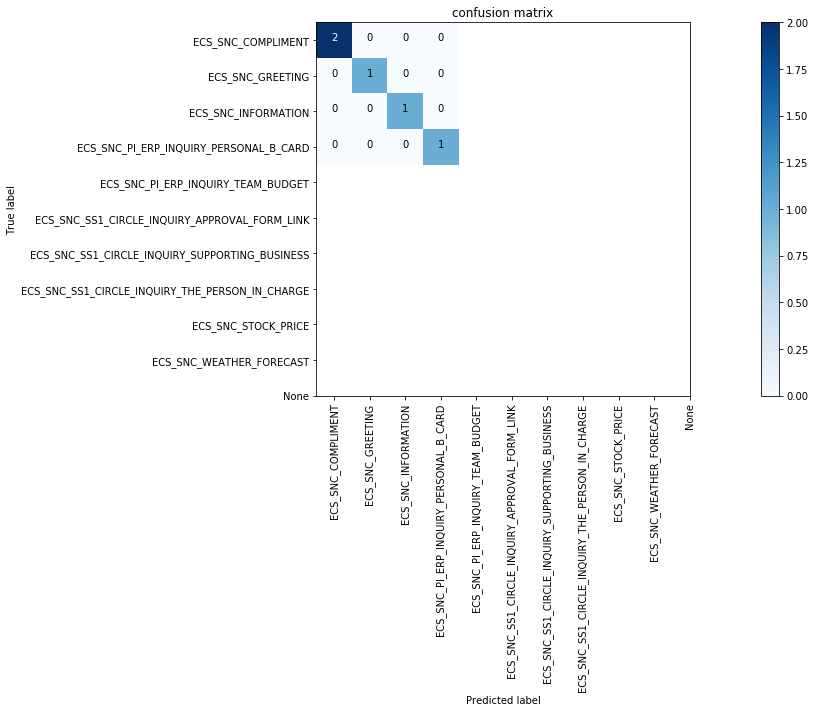

ACC (TRAIN): 0.995
ACC  (TEST): 1.000
------------------------------------------------------


In [47]:
# (fastText) training and testing
run_classifiers(X_train_fast, X_test_fast, y_train_fast, y_test_fast)